# MC vs signal peak of data

Goal: Compare the training variables for the MC and for the signal component of the LHCb data (using sWeights)

In [2]:
name_data = 'common_B0TODst3pi_Dst_constr'
var = 'Dst_constr_B0_M'

In [3]:
from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets


import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_data, load_saved_root, add_constr_Dst, get_real_vars, get_needed_vars, get_df_variables
import plot.histogram as h
from plot.tool import save_file

Welcome to JupyROOT 6.22/02


In [4]:
from numpy import log

## Load data

### Training variables

In [5]:
variables_functions = [
    ('B0_DIRA_OWNPV', 'ln(1-x)'),
    (('B0_ENDVERTEX_CHI2', 'B0_ENDVERTEX_NDOF'), 'x/y'),
    'B0_PT',
    ('B0_FDCHI2_OWNPV', 'ln(x)'),
    'B0_IP_OWNPV', # much better with it
#     'B0_FD_OWNPV',

    ('Dst_DIRA_OWNPV', 'ln(1-x)'), # better with it
    'Dst_PT',
#     'Dst_FDCHI2_OWNPV', # worse with it
    'Dst_IPCHI2_OWNPV',
    'Dst_IP_OWNPV',
#     'Dst_FD_OWNPV', # different for sWeighted and MC

#     ('D0_DIRA_OWNPV', 'ln(1-x)'), # worst with it # different for sWeighted and MC
#     (('D0_ENDVERTEX_CHI2', 'D0_ENDVERTEX_NDOF'), 'x/y'),
    'D0_PT',
    ('D0_FDCHI2_OWNPV', 'ln(x)'),
    ('D0_IPCHI2_OWNPV', 'ln(x)'),
    'D0_IP_OWNPV',
#     'D0_FD_OWNPV', # different for sWeighted and MC

#     ('tau_DIRA_OWNPV', 'ln(1-x)'), # different for sWeighted and MC
    (('tau_ENDVERTEX_CHI2', 'tau_ENDVERTEX_NDOF'), 'x/y'), # a bit worse without it 
    'tau_PT',
    ('tau_FDCHI2_OWNPV', 'ln(x)'),
    ('tau_IPCHI2_OWNPV', 'ln(x)'),
    'tau_IP_OWNPV',
#     'tau_FD_OWNPV', # better without it # different for sWeighted and MC

    'Dst_pion_PT',
    ('Dst_pion_IPCHI2_OWNPV', 'ln(x)'),

    'D0_kaon_PT',
    ('D0_kaon_IPCHI2_OWNPV', 'ln(x)'),

    'D0_pion_PT', # better with it
    ('D0_pion_IPCHI2_OWNPV', 'ln(x)'),
       
#     'B0_ETA', # different for sWeighted and MC
#     'Dst_ETA', # different for sWeighted and MC
#     'D0_ETA', # different for sWeighted and MC
#     'tau_ETA', # different for sWeighted and MC
#     'Dst_pion_ETA', # different for sWeighted and MC
#     'D0_kaon_ETA', # different for sWeighted and MC
#     'D0_pion_ETA', # different for sWeighted and MC
]

In [6]:
needed_variables = get_needed_vars(variables_functions)
# print(variables)

In [7]:
variables = get_real_vars(variables_functions)

In [8]:
add_variables = ['tau_M', 'Dst_M', 'D0_M']

### Load `common` (with sWeights) and `MC` dataframes

In [9]:
df = {}

In [10]:
df['common'] = load_saved_root(name_data+'_sWeights', tree_name='DecayTree', name_folder='common', 
                               vars=needed_variables + add_variables+['sWeight', var])

/afs/cern.ch/user/c/correian/bd2dst3pi/output//root/common/common_B0TODst3pi_Dst_constr_sWeights.root


In [11]:
df['MC'] = load_data(years, magnets, 'all_MC', vars=needed_variables+add_variables + ['B0_M'])
df['MC'] = add_constr_Dst(df['MC'])
# df['MC']  = add_constr_Dst(df['MC'])

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_up_Sim09c-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_down_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_down_Sim09c-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_up_Sim09c-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_down_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_down_Sim09c-ReDecay01.root


### Create the `common` and `MC` dataframes with only the training variables

In [12]:
df['training_common'] = get_df_variables(df['common'], variables_functions + ['sWeight', var])
df['training_MC'] = get_df_variables(df['MC'], variables_functions + [var])

In [13]:
print(df['training_common'].columns)

Index(['B0_DIRA_OWNPV:ln(1-x)', 'B0_ENDVERTEX_CHI2,B0_ENDVERTEX_NDOF:x/y',
       'B0_PT', 'B0_FDCHI2_OWNPV:ln(x)', 'B0_IP_OWNPV',
       'Dst_DIRA_OWNPV:ln(1-x)', 'Dst_PT', 'Dst_IPCHI2_OWNPV', 'Dst_IP_OWNPV',
       'D0_PT', 'D0_FDCHI2_OWNPV:ln(x)', 'D0_IPCHI2_OWNPV:ln(x)',
       'D0_IP_OWNPV', 'tau_ENDVERTEX_CHI2,tau_ENDVERTEX_NDOF:x/y', 'tau_PT',
       'tau_FDCHI2_OWNPV:ln(x)', 'tau_IPCHI2_OWNPV:ln(x)', 'tau_IP_OWNPV',
       'Dst_pion_PT', 'Dst_pion_IPCHI2_OWNPV:ln(x)', 'D0_kaon_PT',
       'D0_kaon_IPCHI2_OWNPV:ln(x)', 'D0_pion_PT',
       'D0_pion_IPCHI2_OWNPV:ln(x)', 'sWeight', 'Dst_constr_B0_M'],
      dtype='object')


## Compare MC and sWeighted $B^0 \to D^{*-}3\pi$ samples

### Range of the variables

In [14]:
range_dic = {
    'B0_PT': [0,35000],
    'Dst_PT':[0,30000],
    'tau_PT':[0,18000],
    'Dst_pion_PT':[0,2300],
    'Dst_kaon_PT':[0,2300],
    'D0_pion_PT':[0,20000],
    'D0_kaon_PT':[0,20000],
    'D0_PT':[0,3000],
    'B0_ENDVERTEX_CHI2':[0,60],
    'tau_ENDVERTEX_CHI2':[None,None],
    'B0_OWNPV_CHI2':[None,None],    
    'B0_FDCHI2_OWNPV':[0, 13000], 
    'B0_DIRA_OWNPV':[0.99996, 1], 
    'Dst_IPCHI2_OWNPV':[0, 2000], 
    'D0_kaon_IPCHI2_OWNPV':[0, 20000], 
    'D0_kaon_IPCHI2_OWNPV':[0, 20000], 
    'D0_pion_IPCHI2_OWNPV':[0, 20000], 
    'pion_IPCHI2_OWNPV':[0, 2000], 
    'tau_FDCHI2_OWNPV':[0, 200000], 
    'tau_FD_OWNPV':[0, 500], 
    'tau_pion0_TRACK_CHI2NDOF':[None,None], 
    'tau_pion1_TRACK_CHI2NDOF':[None,None], 
    'tau_pion2_TRACK_CHI2NDOF':[None,None],
    'D0_ENDVERTEX_CHI2,D0_ENDVERTEX_NDOF:x/y':[0, 10],
    'B0_ENDVERTEX_CHI2,B0_ENDVERTEX_NDOF:x/y':[0, 10],
    'B0_IP_OWNPV':[0, 0.1], 
    'D0_IP_OWNPV':[0, 2], 
    'Dst_IP_OWNPV':[0, 2], 
    'tau_IP_OWNPV':[0, 4], 
    'B0_FD_OWNPV':[0, 100], 
    'Dst_FD_OWNPV':[0, 200], 
    'tau_FD_OWNPV':[0, 150], 
    'D0_FD_OWNPV':[0, 200], 
}

### Plots

=====================  B0_DIRA_OWNPV:ln(1-x) =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/B0_DIRA_OWNPV:ln(1-x)_MC_Signal
=====================  B0_ENDVERTEX_CHI2,B0_ENDVERTEX_NDOF:x/y =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/B0_ENDVERTEX_CHI2,B0_ENDVERTEX_NDOF:xdy_MC_Signal
=====================  B0_PT =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/B0_PT_MC_Signal
=====================  B0_FDCHI2_OWNPV:ln(x) =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/B0_FDCHI2_OWNPV:ln(x)_MC_Signal
=====================  B0_IP_OWNPV =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/B0_IP_OWNPV_MC_Signal
=====================  Dst_DIRA_OWNPV:ln(1-x) =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/Dst_DIRA_OWNPV:ln(1-x)_MC_Signal
=====================  Dst_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/Dst_PT_MC_Signal
=====================  Dst_IPCHI2_OWNPV =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/Dst_IPCHI2_OWNPV_MC_Signal
=====================  Dst_IP_OWNPV =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/Dst_IP_OWNPV_MC_Signal
=====================  D0_PT =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/D0_PT_MC_Signal
=====================  D0_FDCHI2_OWNPV:ln(x) =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/D0_FDCHI2_OWNPV:ln(x)_MC_Signal
=====================  D0_IPCHI2_OWNPV:ln(x) =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/D0_IPCHI2_OWNPV:ln(x)_MC_Signal
=====================  D0_IP_OWNPV =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/D0_IP_OWNPV_MC_Signal
=====================  tau_ENDVERTEX_CHI2,tau_ENDVERTEX_NDOF:x/y =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/tau_ENDVERTEX_CHI2,tau_ENDVERTEX_NDOF:xdy_MC_Signal
=====================  tau_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/tau_PT_MC_Signal
=====================  tau_FDCHI2_OWNPV:ln(x) =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/tau_FDCHI2_OWNPV:ln(x)_MC_Signal
=====================  tau_IPCHI2_OWNPV:ln(x) =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/tau_IPCHI2_OWNPV:ln(x)_MC_Signal
=====================  tau_IP_OWNPV =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/tau_IP_OWNPV_MC_Signal
=====================  Dst_pion_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/Dst_pion_PT_MC_Signal
=====================  Dst_pion_IPCHI2_OWNPV:ln(x) =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/Dst_pion_IPCHI2_OWNPV:ln(x)_MC_Signal
=====================  D0_kaon_PT =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:228: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,6))


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/D0_kaon_PT_MC_Signal
=====================  D0_kaon_IPCHI2_OWNPV:ln(x) =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/D0_kaon_IPCHI2_OWNPV:ln(x)_MC_Signal
=====================  D0_pion_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/D0_pion_PT_MC_Signal
=====================  D0_pion_IPCHI2_OWNPV:ln(x) =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/signal_common_B0TODst3pi_Dst_constr_MC_comparison/D0_pion_IPCHI2_OWNPV:ln(x)_MC_Signal


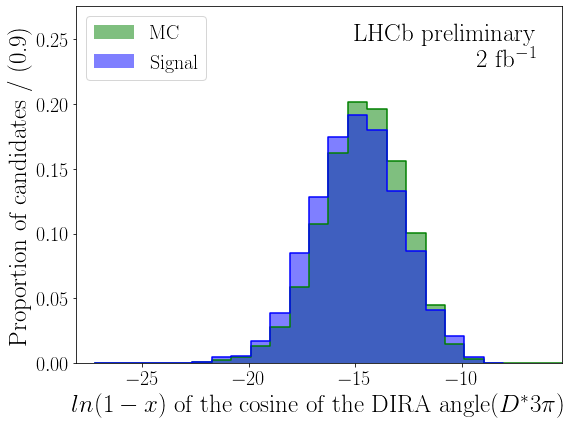

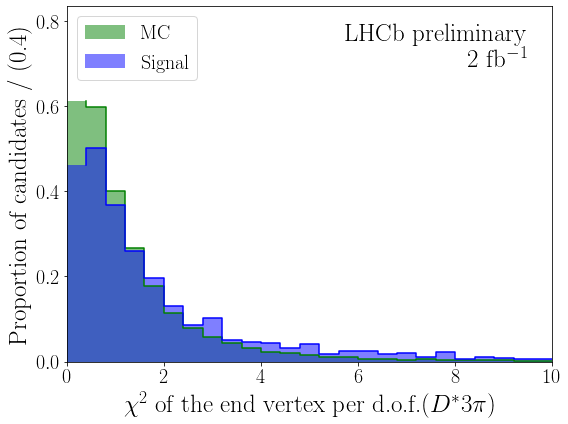

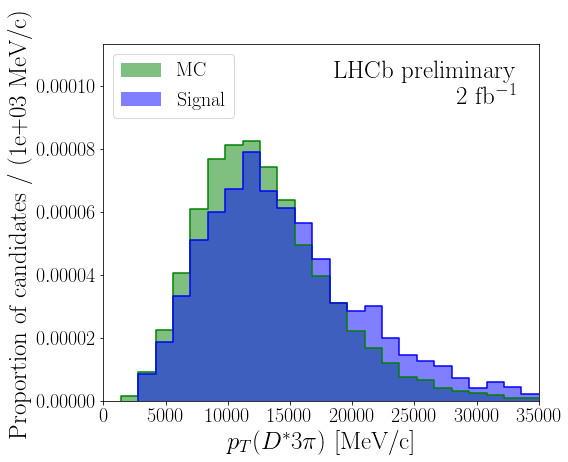

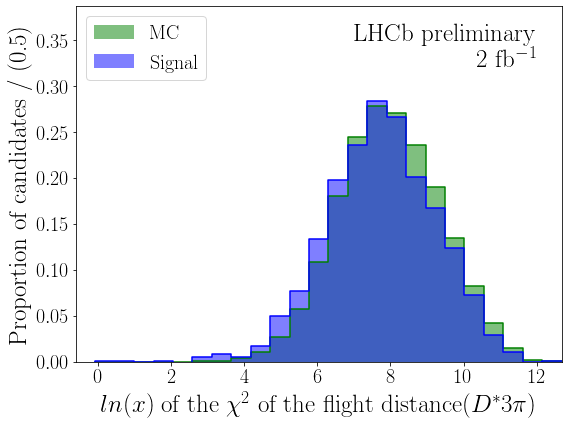

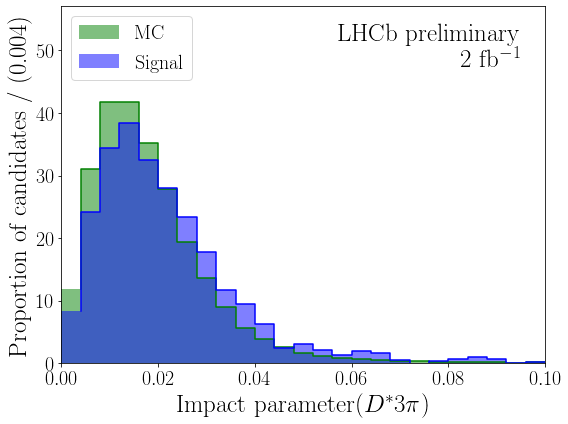

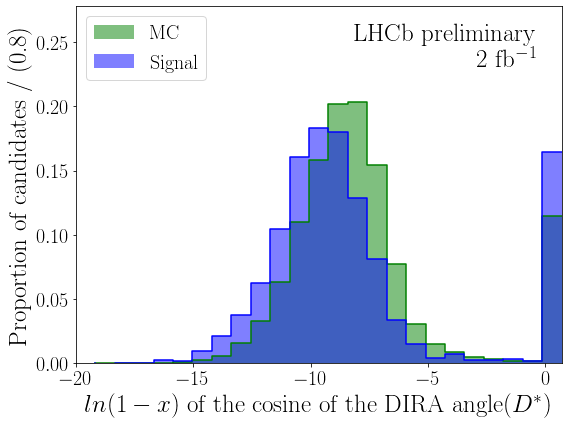

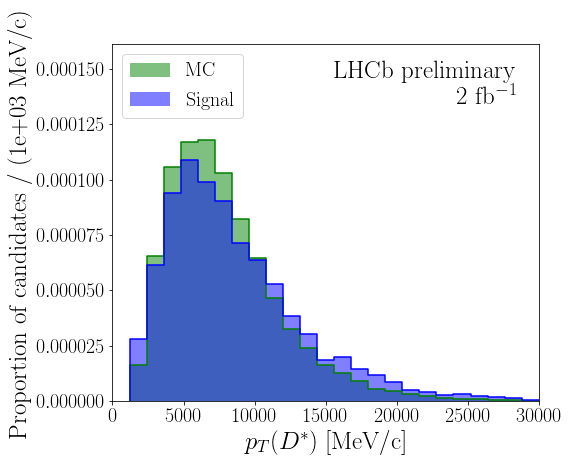

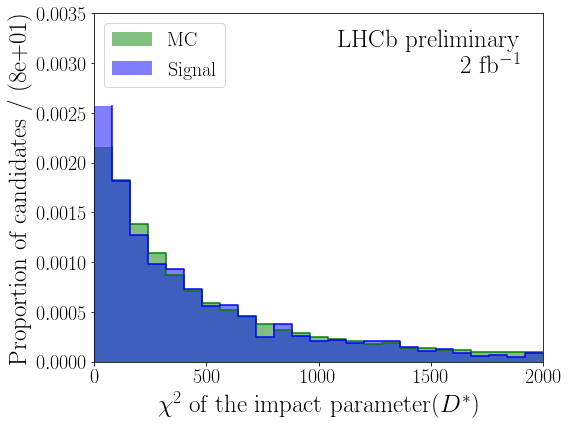

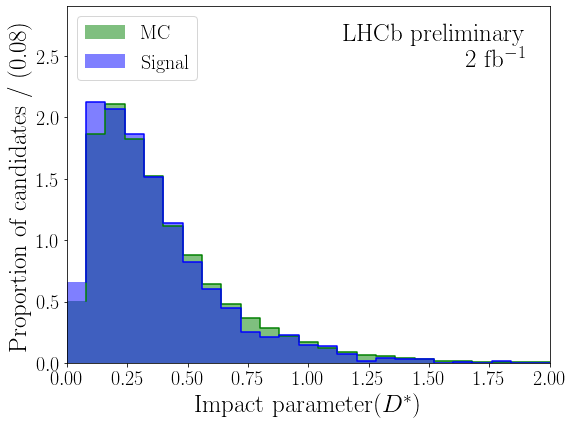

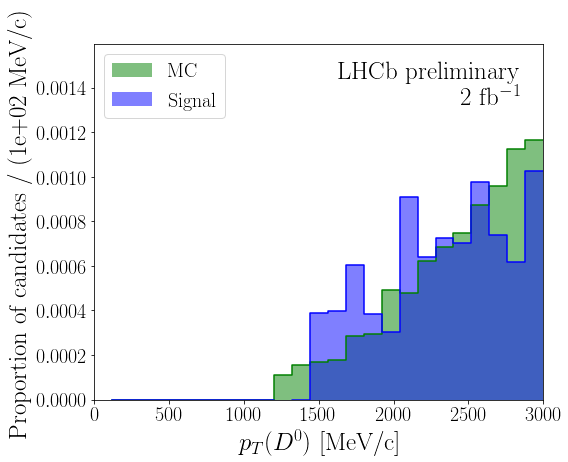

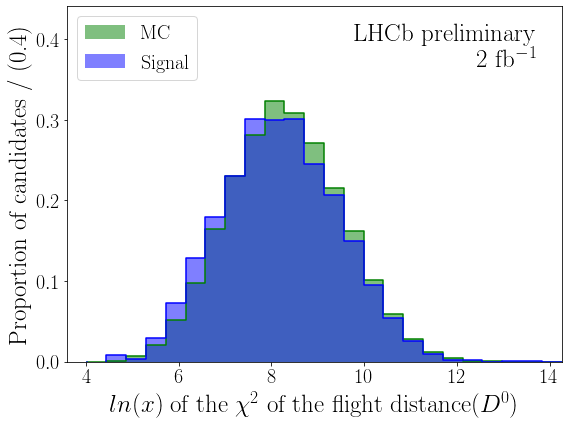

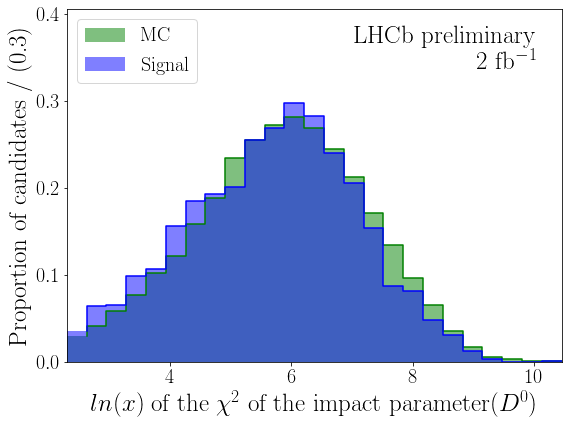

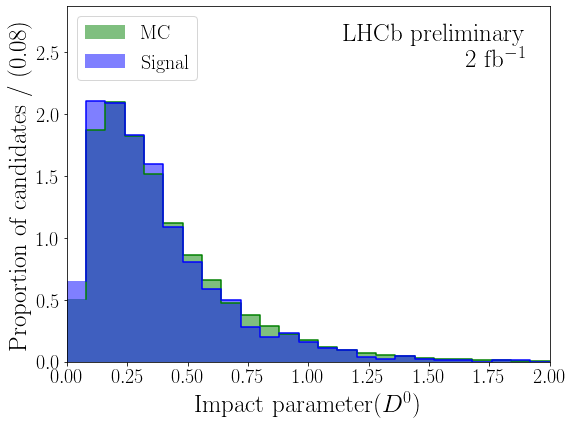

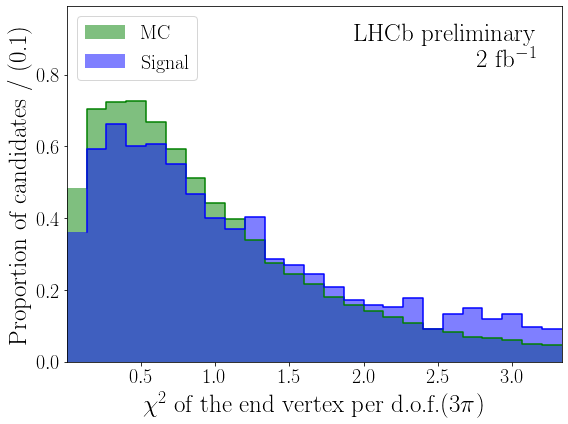

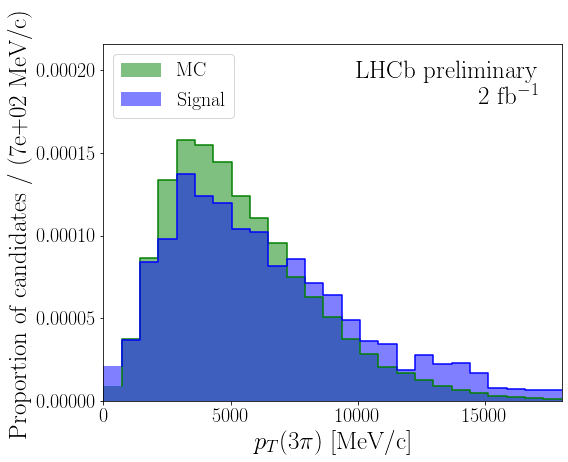

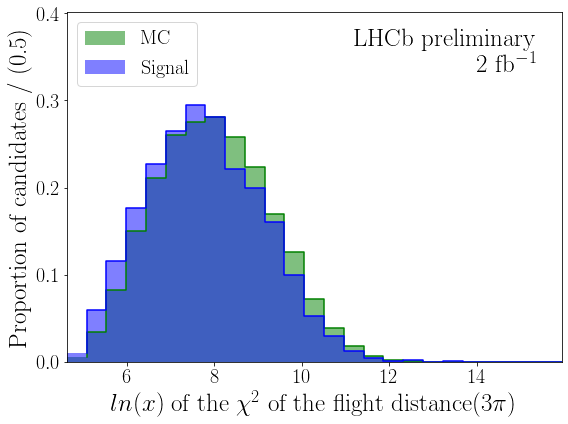

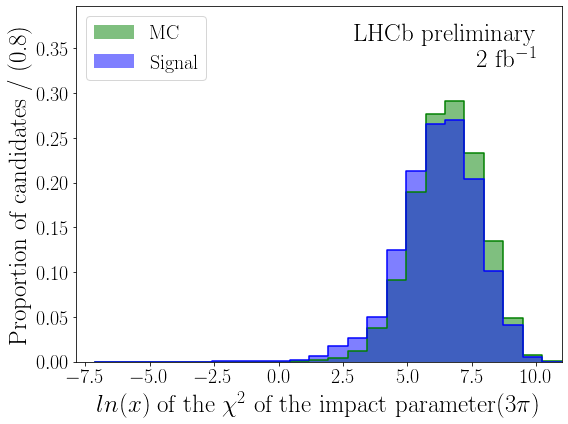

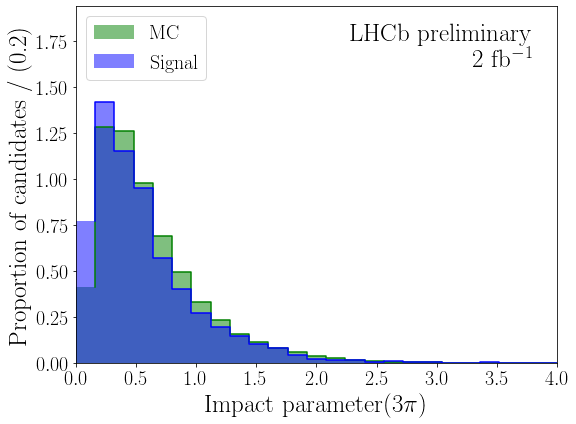

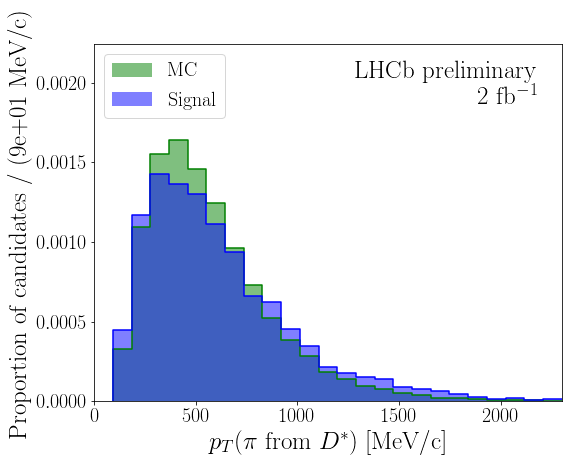

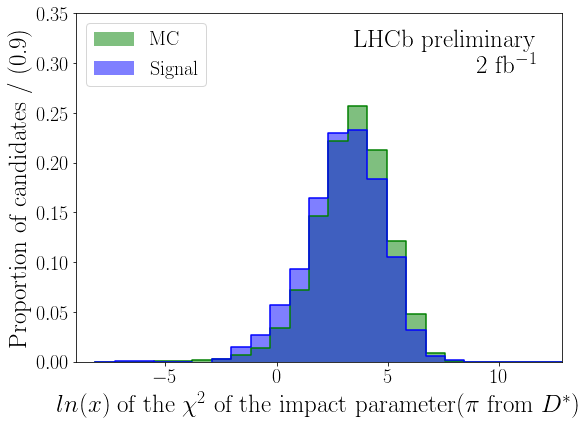

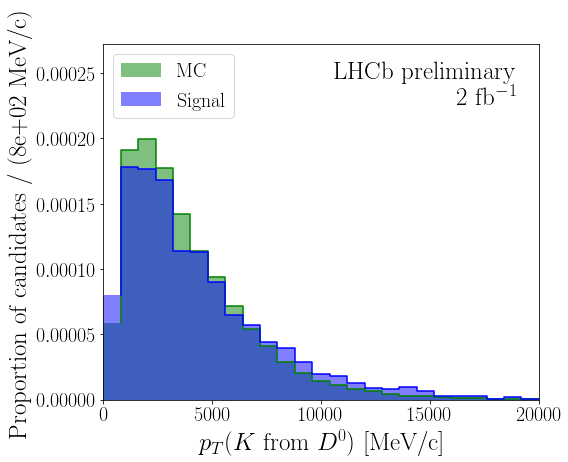

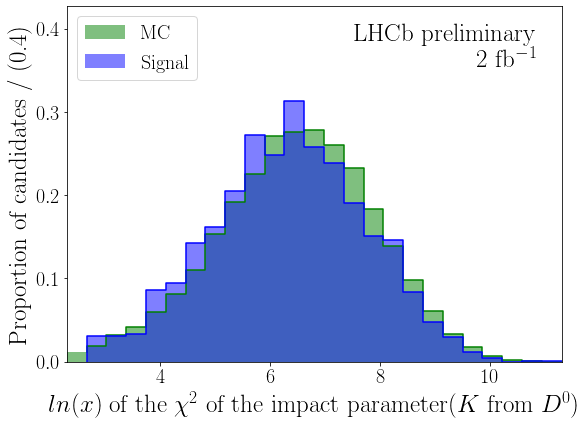

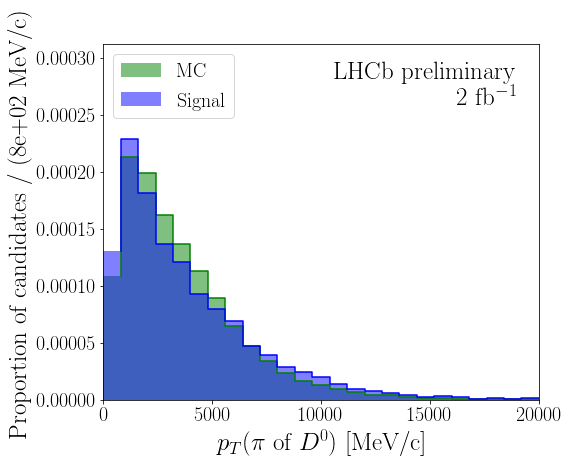

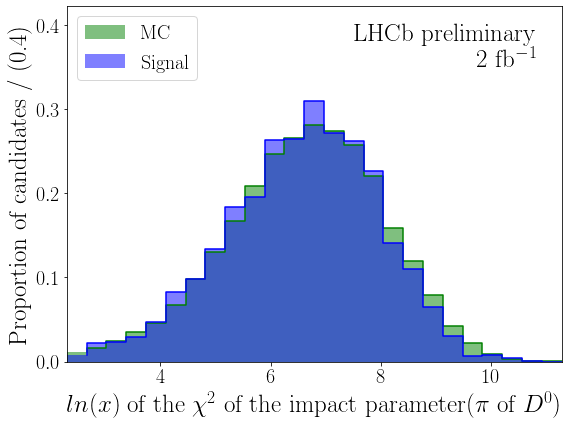

In [37]:
for variable in variables:
    print(f"=====================  {variable} =====================")
    
    if variable in range_dic:
        low = range_dic[variable][0]
        high = range_dic[variable][1]
    else:
        low = None
        high = None
    
    fig, ax = h.plot_hist_particle({'MC': df['training_MC'], 'Signal': df['training_common']}, variable, alpha=0.5, 
                         n_bins=25, mode_hist = True, colors=['g', 'b'], low=low, high=high, 
                         pos_text_LHC=[0.95, 0.95, 'right'], name_folder=f'signal_{name_data}_MC_comparison',
                         weights=[None, df['training_common']['sWeight']], loc_leg='upper left',
                         label_ncounts=False)

Result: The $\eta$ variables aren't that great

## Correlations

In order to be able to apply the $_s$Weights, computed with the constrained $m(D^*3\pi)$ ivnariant mass, to the training variables, they need to be independent conditionally to being a signal or background.
The best way to check that it might be the case is to check that they are uncorrelated for the:
- Signal sample, estimated by doing a cut $5250 < m(D^*3\pi|m(D^*)=m(D^*)_{PDG}) < 5315$ (around the signal peak, not that pure in signal but that the most we can do at this stage)
- Background sample: $5370 < m(D^*3\pi|m(D^*)=m(D^*)_{PDG})$

In [15]:
from scipy.stats import pearsonr

In [16]:
df['signal'] = df['training_common'].query(f'{var} > 5250 and {var} < 5315')
df['background'] = df['training_common'].query(f'{var} > 5370')

In [17]:
for variable in variables:
    print("---------------------------------------------------")
    print(variable)
    print()
    print(f"Signal: {pearsonr(df['signal'][variable], df['signal'][var])[0]}")
    print(f"Background {pearsonr(df['background'][variable], df['background'][var])[0]}")
    

---------------------------------------------------
B0_DIRA_OWNPV:ln(1-x)

Signal: 0.03364265481144675
Background 0.048382352237983824
---------------------------------------------------
B0_ENDVERTEX_CHI2,B0_ENDVERTEX_NDOF:x/y

Signal: 0.00727940486474905
Background -0.002264785690137406
---------------------------------------------------
B0_PT

Signal: -0.0015239038279485431
Background -0.023089090655629793
---------------------------------------------------
B0_FDCHI2_OWNPV:ln(x)

Signal: -0.024509365413003824
Background -0.018797604227318073
---------------------------------------------------
B0_IP_OWNPV

Signal: 0.031005955722307056
Background -0.000840450880500318
---------------------------------------------------
Dst_DIRA_OWNPV:ln(1-x)

Signal: 0.026792863418710147
Background 0.022353487313523778
---------------------------------------------------
Dst_PT

Signal: 0.0032642415033138712
Background 0.0006959468382982501
---------------------------------------------------
Dst_IPCHI2_

The training variables are uncorrelated with $m(D^*3\pi|m(D^*)=m(D^*)_{PDG})$ so the $_S$Weights can be applied safely to the training variables of the `common` data.